## From Previous analysis we see shackleton-s has the highest interaction in terms of received and sent mails. This analysis is to find out top words used by ceo, chairperson and shackleton-s

In [23]:
import os
import glob
import re
import email
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from email.parser import Parser

In [29]:
os.chdir("D:")
a=os.getcwd()
ceo_path= glob.glob(r'D:\enron_mail_20150507\maildir\skilling-j*')
cp_path= glob.glob(r'D:\enron_mail_20150507\maildir\lay-k*')
shack_path= glob.glob(r'D:\enron_mail_20150507\maildir\shackleton-s')


In [30]:
def frequency_list(list):
    frequency = {}
    for y in list:
        if y not in frequency:
            frequency[y] = 1
        else:
            frequency[y] += 1
    return frequency

In [56]:
def get_top_words(frequency_words):
    sorted_list = sorted(frequency_words.items(), key = lambda x:x[1], reverse = True)
    top_10_words = sorted_list[0:50]
    return top_10_words

In [57]:
email_body_ceo = []
sent_str = ''
for folder_list in ceo_path:
    all_folders = glob.glob(os.path.join(folder_list, '*sent*'))
    for all_sent_folders in all_folders:
        all_mails = glob.glob(os.path.join(all_sent_folders, '*'))
        for mail in all_mails:
            with open(mail, "r") as f:
                data = f.read()
            email = Parser().parsestr(data)
            email_body_ceo.append(email.get_payload())
    with open("email_ceo_content.txt", "w") as f:
        for email_content in email_body_ceo:
            f.write(email_content)
            

    with open("email_ceo_content.txt", "r") as f:
        data = f.read()
    words= word_tokenize(data)
    filtered_words = [word for word in words if word not in stopwords.words('english')]
    nonPunct = re.compile('.*[A-Za-z].*')  # filter out punctutations, only characters present
    clean_word_list = [w for w in filtered_words if nonPunct.match(w)]
    words_lower = [x.lower() for x in clean_word_list]
    frequency_words = frequency_list(words_lower)
    ceo_top_words = get_top_words(frequency_words)

In [70]:
count=1
with open("Ceo_Analysis 3"+'.csv','w', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(['Word','Rank', 'Frequency'])
    for r in ceo_top_words:
        writer.writerow([r[0],count,r[1]])
        count+=1

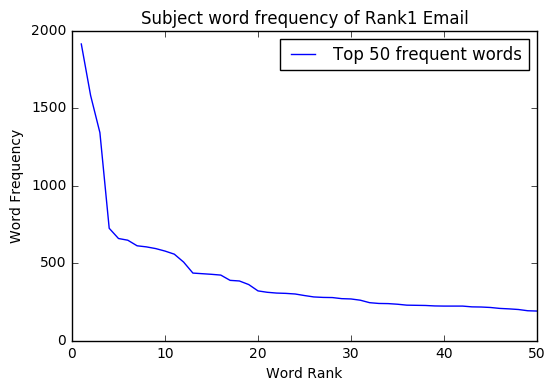

In [73]:
import csv
import matplotlib.pyplot as plt

x = []
y = []

with open('Ceo_Analysis 3.csv','r') as csvfile:
    plots = csv.reader(csvfile, delimiter=',')
    for row in plots:
        x.append(row[1])
        y.append(row[2])
del x[0]
x = [int(i) for i in x]
del y[0]
y = [int(i) for i in y]

plt.plot(x[:50],y[:50], label="Top 50 frequent words")
plt.xlabel('Word Rank')
plt.ylabel('Word Frequency')
plt.title("Subject word frequency of Rank1 Email")
plt.legend()
plt.show()

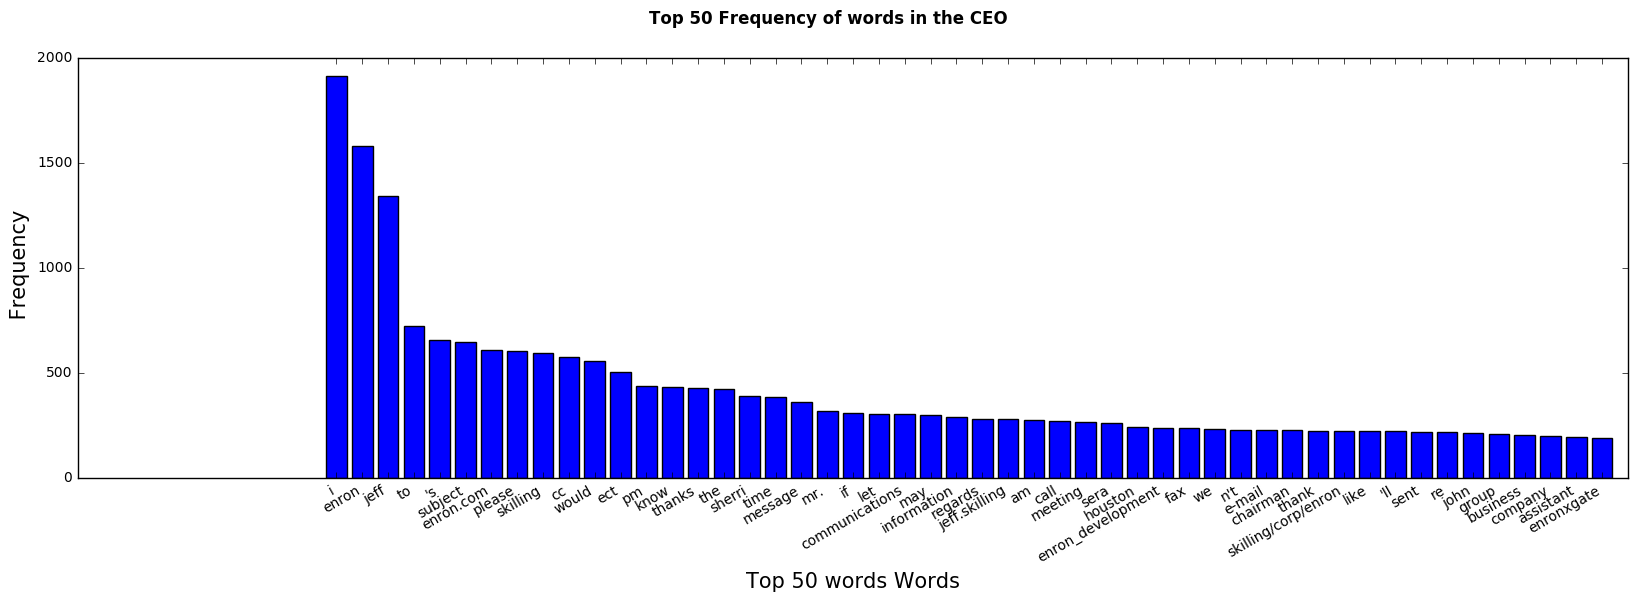

In [74]:
freq = {}
with open('Ceo_Analysis 3.csv') as f:
    reader = csv.DictReader(f)
    i= 0
    for r in reader:
        if i == 55:break
        freq[r['Word']] = int(r['Frequency'])
        i+=1
freq = sorted(freq.items(), key=operator.itemgetter(1), reverse=True)
labels, values = zip(*freq)
plt.bar(range(len(freq)), values, align='center')
plt.xticks(range(len(freq)), labels)
fig = plt.gcf()
fig.set_size_inches(20, 6)
plt.suptitle('Top 50 Frequency of words in the CEO' , fontsize=12, fontweight='bold')
plt.ylabel(" Frequency", fontsize=15)
plt.xlabel("Top 50 words Words", fontsize=15)
fig.autofmt_xdate()
plt.show()

In [81]:
email_body_chairman = []
sent_str = ''
for folder_list in cp_path:
    all_folders = glob.glob(os.path.join(folder_list, '*sent*'))
    for all_sent_folders in all_folders:
        all_mails = glob.glob(os.path.join(all_sent_folders, '*'))
        for mail in all_mails:
            with open(mail, "r") as f:
                data = f.read()
            email = Parser().parsestr(data)
            email_body_chairman.append(email.get_payload())
    with open("email_chair_content.txt", "w") as f:
        for email_chair_content in email_body_chairman:
            f.write(email_chair_content)

# below code will read the text file and filter stopwords and punctuations calculate frequency and fetch top 10 words
    with open("email_chair_content.txt", "r") as f:
        data = f.read()
    words= word_tokenize(data)
    filtered_words = [word for word in words if word not in stopwords.words('english')]
    nonPunct = re.compile('.*[A-Za-z].*')  # filter out punctutations, only characters present
    clean_word_list = [w for w in filtered_words if nonPunct.match(w)]
    words_lower = [x.lower() for x in clean_word_list]
    frequency_words = frequency_list(words_lower)
    chair_top_words = get_top_words(frequency_words)

In [83]:
count=1
with open("Cp_Analysis 3"+'.csv','w', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(['Word','Rank', 'Frequency'])
    for r in chair_top_words:
        writer.writerow([r[0],count,r[1]])
        count+=1

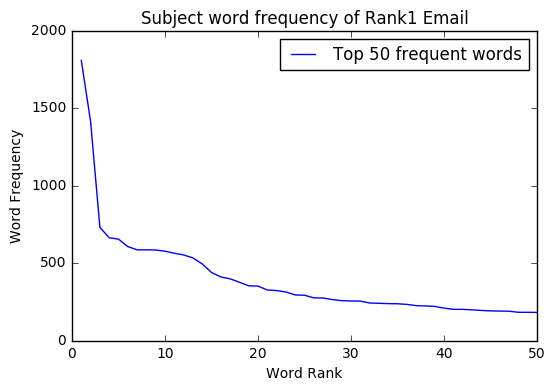

In [84]:
import csv
import matplotlib.pyplot as plt

x = []
y = []

with open('Cp_Analysis 3.csv','r') as csvfile:
    plots = csv.reader(csvfile, delimiter=',')
    for row in plots:
        x.append(row[1])
        y.append(row[2])
del x[0]
x = [int(i) for i in x]
del y[0]
y = [int(i) for i in y]

plt.plot(x[:50],y[:50], label="Top 50 frequent words")
plt.xlabel('Word Rank')
plt.ylabel('Word Frequency')
plt.title("Subject word frequency of Rank1 Email")
plt.legend()
plt.show()

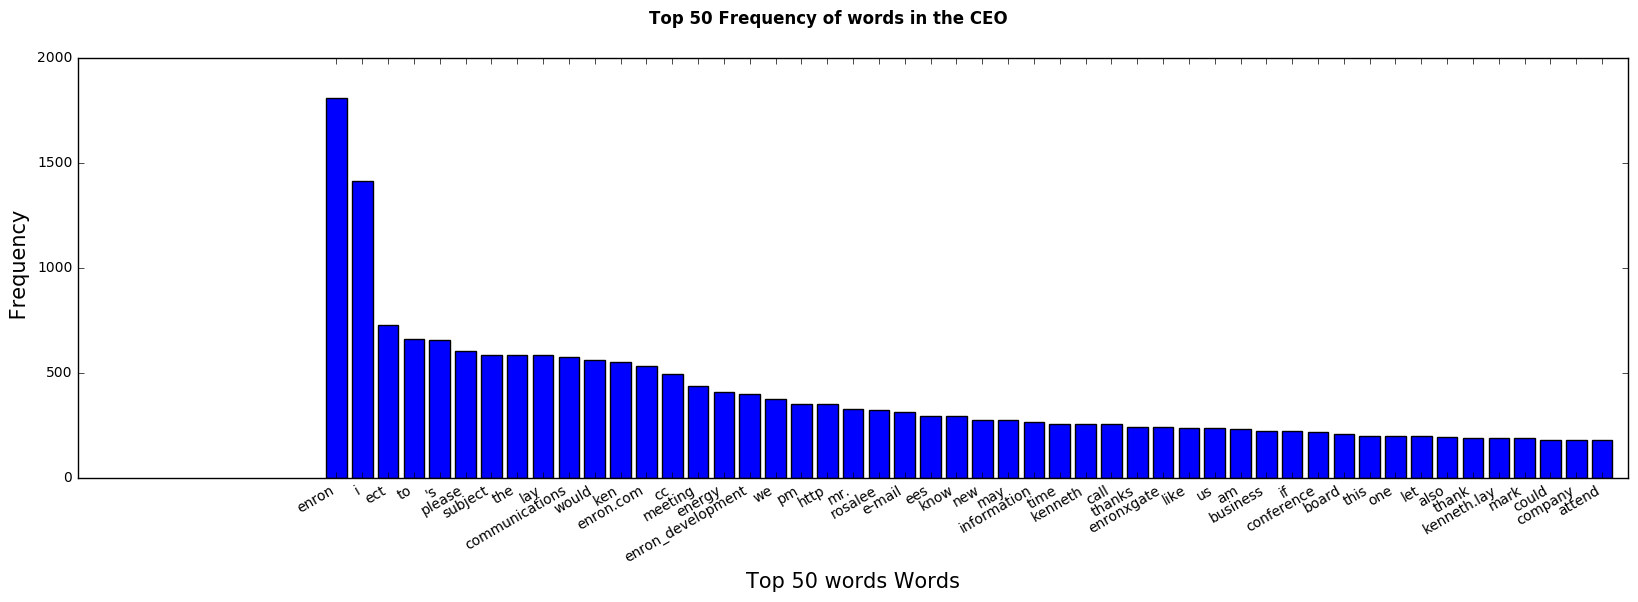

In [85]:
freq = {}
with open('Cp_Analysis 3.csv') as f:
    reader = csv.DictReader(f)
    i= 0
    for r in reader:
        if i == 55:break
        freq[r['Word']] = int(r['Frequency'])
        i+=1
freq = sorted(freq.items(), key=operator.itemgetter(1), reverse=True)
labels, values = zip(*freq)
plt.bar(range(len(freq)), values, align='center')
plt.xticks(range(len(freq)), labels)
fig = plt.gcf()
fig.set_size_inches(20, 6)
plt.suptitle('Top 50 Frequency of words in the CEO' , fontsize=12, fontweight='bold')
plt.ylabel(" Frequency", fontsize=15)
plt.xlabel("Top 50 words Words", fontsize=15)
fig.autofmt_xdate()
plt.show()

## FInding Word Rank

In [91]:
email_body_shack = []
sent_str = ''
for folder_list in shack_path:
    all_folders = glob.glob(os.path.join(folder_list, '*sent*'))
    for all_sent_folders in all_folders:
        all_mails = glob.glob(os.path.join(all_sent_folders, '*'))
        for mail in all_mails:
            with open(mail, "r") as f:
                data = f.read()
            email = Parser().parsestr(data)
            email_body_shack.append(email.get_payload())
    with open("email_shack_content.txt", "w") as f:
        for email_content in email_body_shack:
            f.write(email_content)
            
# below code will read the text file and filter stopwords and punctuations calculate frequency and fetch top 10 words
    with open("email_shack_content.txt", "r") as f:
        data = f.read()
    words= word_tokenize(data)
    filtered_words = [word for word in words if word not in stopwords.words('english')]
    nonPunct = re.compile('.*[A-Za-z].*')  # filter out punctutations, only characters present
    clean_word_list = [w for w in filtered_words if nonPunct.match(w)]
    words_lower = [x.lower() for x in clean_word_list]
    frequency_words = frequency_list(words_lower)
    shack_top_words = get_top_words(frequency_words)

In [92]:
count=1
with open("Shack_Analysis 3"+'.csv','w', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(['Word','Rank', 'Frequency'])
    for r in shack_top_words:
        writer.writerow([r[0],count,r[1]])
        count+=1

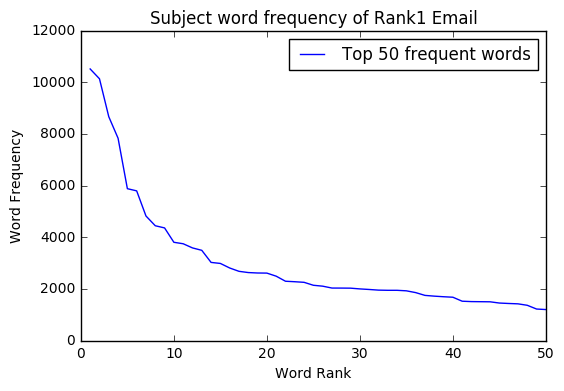

In [93]:
import csv
import matplotlib.pyplot as plt

x = []
y = []

with open('Shack_Analysis 3.csv','r') as csvfile:
    plots = csv.reader(csvfile, delimiter=',')
    for row in plots:
        x.append(row[1])
        y.append(row[2])
del x[0]
x = [int(i) for i in x]
del y[0]
y = [int(i) for i in y]

plt.plot(x[:50],y[:50], label="Top 50 frequent words")
plt.xlabel('Word Rank')
plt.ylabel('Word Frequency')
plt.title("Subject word frequency of Rank1 Email")
plt.legend()
plt.show()

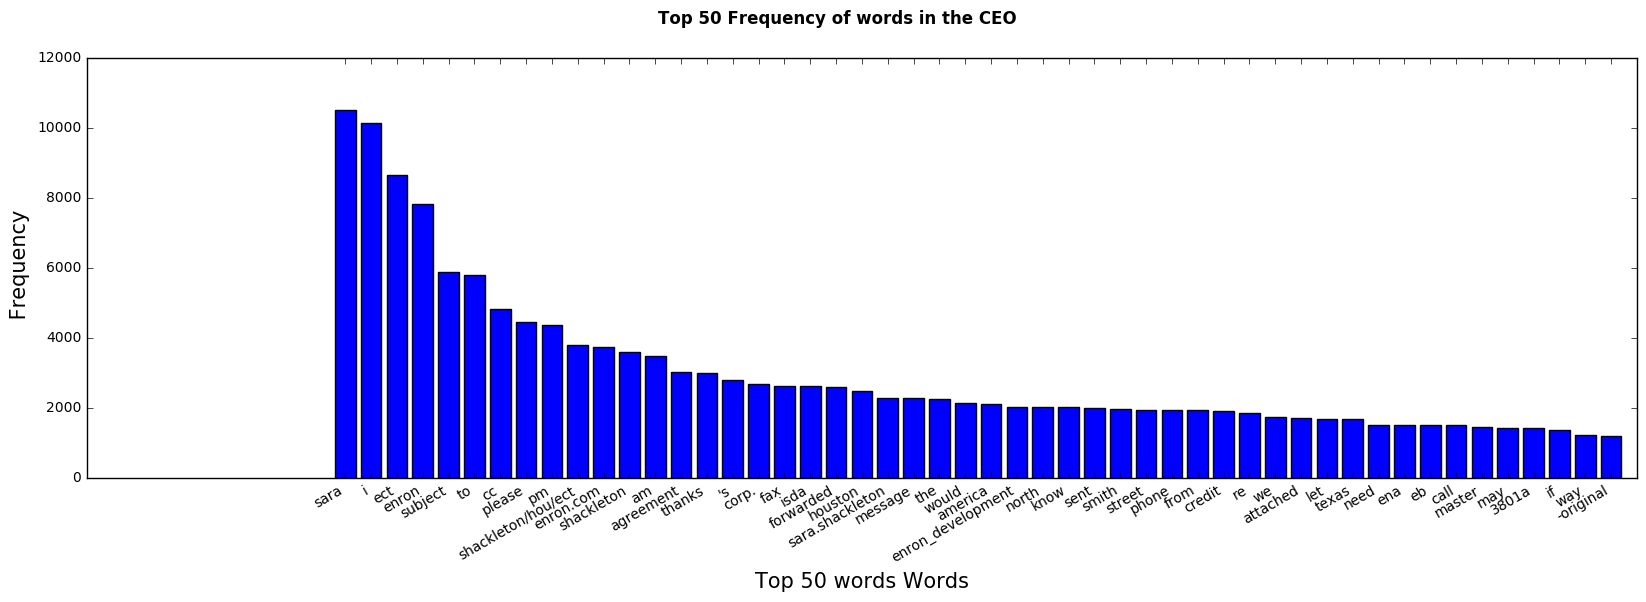

In [94]:
freq = {}
with open('Shack_Analysis 3.csv') as f:
    reader = csv.DictReader(f)
    i= 0
    for r in reader:
        if i == 55:break
        freq[r['Word']] = int(r['Frequency'])
        i+=1
freq = sorted(freq.items(), key=operator.itemgetter(1), reverse=True)
labels, values = zip(*freq)
plt.bar(range(len(freq)), values, align='center')
plt.xticks(range(len(freq)), labels)
fig = plt.gcf()
fig.set_size_inches(20, 6)
plt.suptitle('Top 50 Frequency of words in the CEO' , fontsize=12, fontweight='bold')
plt.ylabel(" Frequency", fontsize=15)
plt.xlabel("Top 50 words Words", fontsize=15)
fig.autofmt_xdate()
plt.show()